In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Path
path = r'C:\Users\Pink PC\Downloads\Instacart Basket Analysis'

In [3]:
#Import ords_prods_all dataframe
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_derived.pkl'))

<Axes: xlabel='orders_day_of_week'>

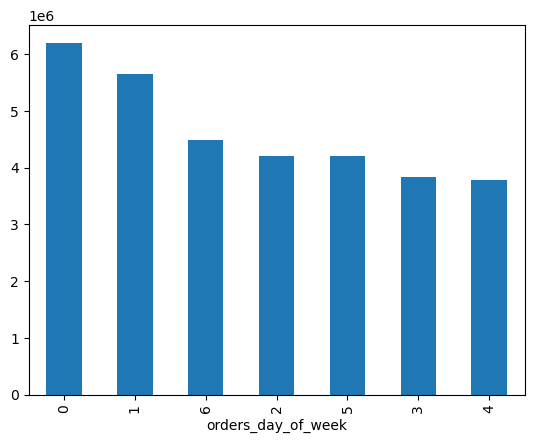

In [4]:
df_ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

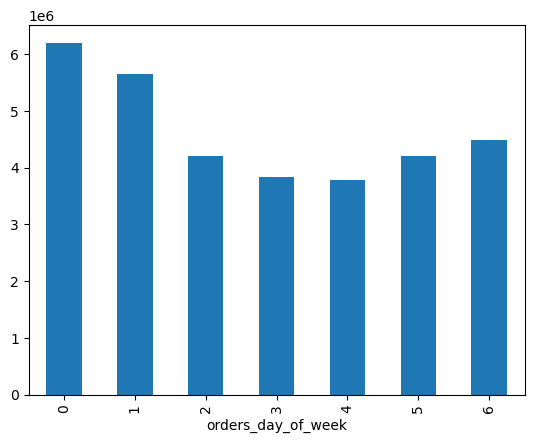

In [5]:
#Sort by index - days of the week in order
Bar = df_ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

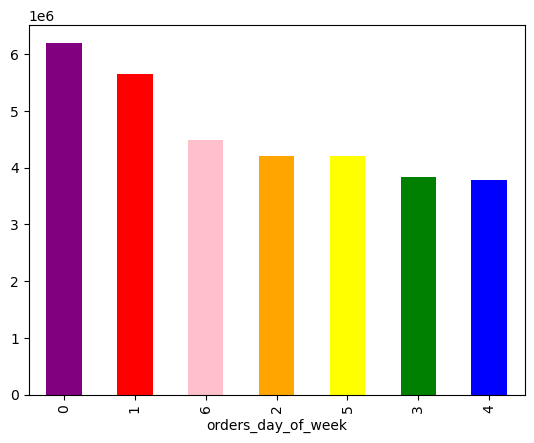

In [6]:
#Adding color to the bars
bar = df_ords_prods_all['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [7]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

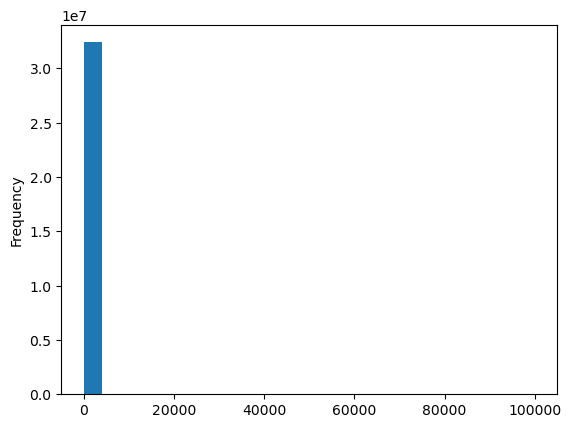

In [8]:
df_ords_prods_all['prices'].plot.hist(bins=25)

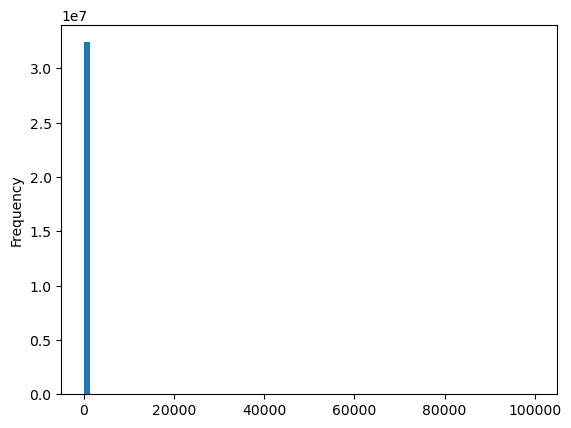

In [9]:
hist = df_ords_prods_all['prices'].plot.hist(bins=70)

In [10]:
#Export the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [11]:
#Create a subset of the dataframe
df=df_ords_prods_all[:2000000]

In [12]:
df

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average spent,spending flag,regularity,order frequency flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,4192,Hardwood Smoked Peppered Thick Sliced Bacon,106,12,21.3,860175,18868,prior,6,1,...,High-range product,Regularly busy,Busiest days,Average orders,7,New customer,8.402609,Low spender,10.0,Frequent customer
1999996,4192,Hardwood Smoked Peppered Thick Sliced Bacon,106,12,21.3,976519,18868,prior,7,4,...,High-range product,Least busy,Slowest days,Most orders,7,New customer,8.402609,Low spender,10.0,Frequent customer
1999997,4192,Hardwood Smoked Peppered Thick Sliced Bacon,106,12,21.3,1590337,18986,prior,2,0,...,High-range product,Busiest day,Busiest days,Most orders,9,New customer,7.957619,Low spender,29.0,Non-frequent customer
1999998,4192,Hardwood Smoked Peppered Thick Sliced Bacon,106,12,21.3,2550068,18986,prior,3,0,...,High-range product,Busiest day,Busiest days,Most orders,9,New customer,7.957619,Low spender,29.0,Non-frequent customer


In [13]:
#Create the seed
np.random.seed(4)

In [14]:
#Create a list holding True/False values to test the np.random.rand () <= 0.7
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [17]:
#Store 70% of the sample in the dataframe big
big = df_ords_prods_all[dev]

In [18]:
#Store 30% of the sample in the dataframe small
small = df_ords_prods_all[~dev]

In [19]:
len(df_ords_prods_all)

32404859

In [20]:
len(big) + len(small)

32404859

In [21]:
df_2=small[['orders_day_of_week', 'prices']]

C:\Users\Pink PC\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pink PC\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


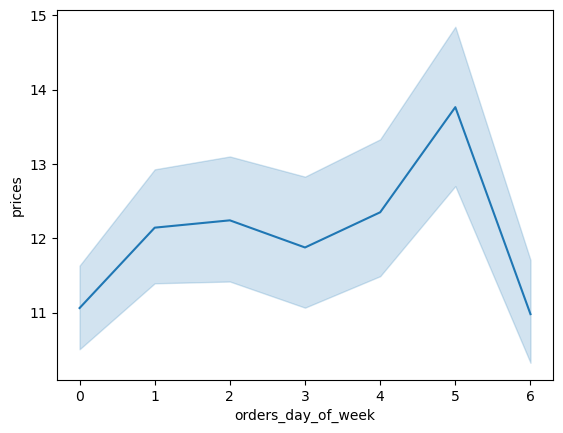

In [22]:
#Create Line Chart for the 30% sample
line=sns.lineplot(data=df_2, x='orders_day_of_week', y='prices')

In [23]:
#Exporting the line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_dow.png'))

In [24]:
#Create a histogram of the hour_of_day_ordered column
hist_hour_of_day_ordered = df_ords_prods_all['hour_of_day_ordered'].plot.hist(bins=24)

KeyError: 'hour_of_day_ordered'

In [ ]:
#Export the histogram
hist_hour_of_day_ordered.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour_of_day_ordered.png'))

##The histogram demonstrates that the least busy times are from 1am - 6am. The peak hours for orders are from approximately 9am - 6pm. After 5pm, orders start to decline and each subsequent hour after, continues to steadily decline. 

In [ ]:
#Create a bar chart from the loyalty_flag column
bar_loyalty_flag = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar()

In [ ]:
#Check if there is a difference in expenditures depending on the hour of the day
##Create the seed
np.random.seed(4)

In [ ]:
#Create a list holding True/False values to test the np.random.rand () <= 0.7
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [ ]:
dev

In [ ]:
np.random.rand(10)

In [ ]:
#Store 70% of the sample in the dataframe big
big = df_ords_prods_all[dev]

In [ ]:
#Store 30% of the sample in the dataframe small
small = df_ords_prods_all[~dev]

In [ ]:
len(df_ords_prods_all)

In [ ]:
len(big) + len(small)

In [ ]:
df_3=small[['hour_of_day_ordered', 'prices']]

In [ ]:
#Create Line Chart for the 30% sample
line_hour_of_day_ordered=sns.lineplot(data=df_3, x='hour_of_day_ordered', y='prices')

In [ ]:
#Exporting the line chart
line_hour_of_day_ordered.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_of_day_ordered.png'))

In [ ]:
#Check if there is a connection between age and number dependants
##Create the seed
np.random.seed(4)

In [ ]:
#Create a list holding True/False values to test the np.random.rand () <= 0.7
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [ ]:
dev

In [ ]:
np.random.rand(10)

In [ ]:
#Store 70% of the sample in the dataframe big
big = df_ords_prods_all[dev]

In [ ]:
#Store 30% of the sample in the dataframe small
small = df_ords_prods_all[~dev]

In [ ]:
len(df_ords_prods_all)

In [ ]:
len(big) + len(small)

In [ ]:
df_4=small[['Number_of_Dependants', 'Age']]

In [ ]:
#Create Line Chart for the 30% sample
line_number_of_dependants=sns.lineplot(data=df_4, x='Age', y='Number_of_Dependants')

In [ ]:
#Exporting the line chart
line_number_of_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_number_of_dependants.png'))

##The line chart does not show a correlation between age and number of dependants. 

In [ ]:
#Create a scatterplot to see if there is a connection between age and income
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_ords_prods_all)

In [ ]:
#Exporting the scatterplot
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))

##The scatterplot shows that the the highest density of income across all ages is between $0.00 - $200,000. Then the next highest income bracket is from $200,000 - $300,000 for the 40+ age group. There are income values from $200,000 - $400,000 across all age ranges. Finally, there are income values of $300,000 - $600,000 scattered across the 40+ age ranges as well. 

#Save the notebook